<a href="https://colab.research.google.com/github/nakibworkspace/DataAnalysis/blob/main/Goldpricepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
data= pd.read_csv("/content/gld_price_data.csv.xls")

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
positive or negative

In [12]:
data= data.drop(['Date'],axis=1)

In [13]:
correlation = data.corr()

<Axes: >

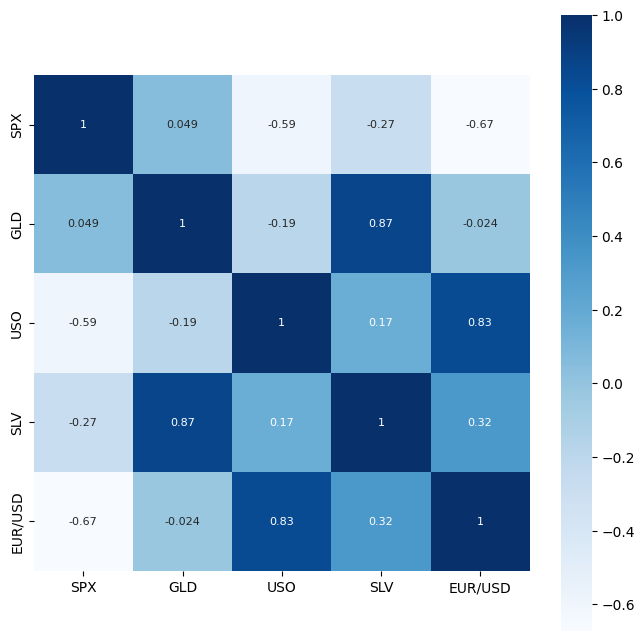

In [17]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws= {'size':8}, cmap='Blues')

In [18]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-140800913fcc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='Green')


<Axes: xlabel='GLD', ylabel='Density'>

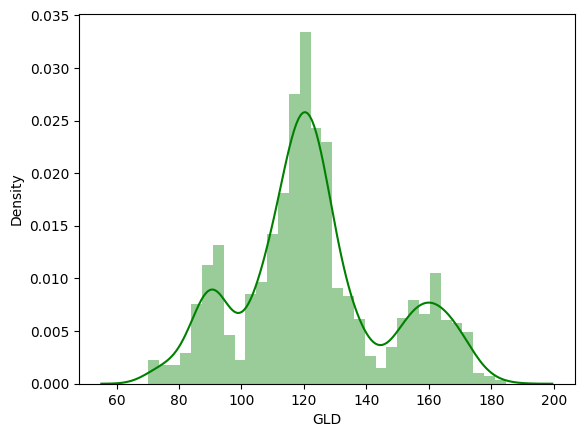

In [19]:
#checking the distribution of the gold price
sns.distplot(data['GLD'],color='Green')

Splitting the features and target

In [21]:
X= data.drop(['GLD'], axis=1)
Y= data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model training : Random forest regressor

In [25]:
regressor= RandomForestRegressor(n_estimators=100)

In [26]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model evaluation

In [27]:
test_data_prediction= regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.55289922  82.21399987 116.09320006 127.711601   120.65320124
 154.63989791 150.12129834 126.06240043 117.52099871 125.99810034
 116.52520062 171.9677008  141.50759834 167.90889804 115.10849987
 117.89560056 139.68580309 170.26800097 159.755304   156.25220001
 155.32590051 125.02590055 176.03419899 156.80460405 125.32840035
  93.74359968  77.24810012 120.5692999  119.04739926 167.52989935
  88.06249999 125.26990017  90.99200059 117.69010009 121.05929915
 136.07270105 115.69220103 115.32050092 147.04960058 107.23180136
 104.7293023   87.25749776 126.47850067 117.90039964 152.75879867
 119.6704001  108.37650019 108.25559822  93.12960082 127.00349788
  74.93790016 113.67739923 121.3381001  111.20599904 118.91929892
 120.49909969 159.89369913 167.7951013  146.80509655  85.84549845
  94.45890035  86.97439851  90.79240016 118.98680084 126.34190096
 127.5410999  170.71519997 122.35269944 117.47589883  98.6824007
 168.22640111 142.93239859 131.39440318 121.09480235 120.63289967
 119.574000

In [29]:
#R squared error
error_score= metrics.r2_score(Y_test, test_data_prediction)

In [30]:
print("R squared error: ", error_score)

R squared error:  0.9894032984711042


In [31]:
Y_test= list(Y_test)

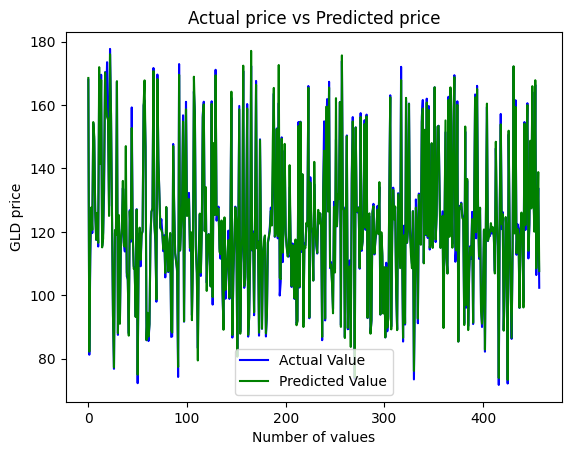

In [32]:
plt.plot(Y_test, color= "Blue", label="Actual Value")
plt.plot(test_data_prediction, color="Green", label="Predicted Value")
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()